## *Задача 1* 


Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times n$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).




In [7]:
import sys as ss
import scipy
import scipy.sparse
import scipy.linalg
import numpy as np

import time

N = 100
m = 3

b = np.random.rand(N)

t1 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()

mem = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)

t2 = time.time()

x = scipy.linalg.solve(A, b)
print(A, x, sep = '\n')

t3 = time.time()

print("Generation took %s ms" % ((t2 - t1) * 1000))
print("Solution took %s ms" % ((t3 - t2) * 1000))
print("Memory used: {}".format(mem))

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]
[ 0.06514582 -2.76683217  1.4224609   2.94436768  2.14748068 -1.08915159
 -6.40387909 -1.00090041  4.17206421  6.06096021  1.13322406 -7.56285348
 -4.23193788  1.7203599   6.53317811  4.05409617 -4.91062075 -4.45432187
 -1.23403982  4.54231538  4.96702172 -2.14115126 -3.17548324 -2.03295914
  1.63281501  3.55624734 -0.71523459 -0.64894367 -0.7935505   0.06787771
  0.92563041 -1.39434358  0.53439072  1.08398874  0.90709126  0.02242361
 -3.21549239 -0.14490765  2.11607675  2.72044873  0.72706817 -3.9338362
 -1.89123047  0.97999961  3.888654    2.98461713 -3.15295388 -3.63890576
 -1.70885806  3.73354913  5.11584879 -0.90481861 -3.53362442 -3.91417785
  1.54463963  4.76798198  1.67840222 -1.26776548 -4.27316062 -0.99085325
  3.18636368  2.72781974  1.16867535 -3.1156715  -2.09855214  0.98085167
  1.60078503  1.69974761 -1.09838863 -0.34

In [9]:
t1 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
A = np.zeros((2 * m + 1, N))
A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw
mem = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)
t2 = time.time() 

x = scipy.linalg.solve_banded((m, m), A, b)
print(A, x, sep = '\n')

t3 = time.time()

print("Generation took %s ms" % ((t2 - t1) * 1000))
print("Solution took %s ms" % ((t3 - t2) * 1000))
print("Memory used: {}".format(mem))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [10]:
import sys as ss
import scipy
import numpy as np
from scipy.sparse.linalg import spsolve

t1 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
# убрали .toarray() - чтобы сохранить разреженную форму

# https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg 
mem = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)

t2 = time.time()

x = spsolve(A,b)
print(A, x, sep = '\n')

t3 = time.time()

print("Generation took %s ms" % ((t2 - t1) * 1000))
print("Solution took %s ms" % ((t3 - t2) * 1000))
print("Memory used: {} bytes".format(mem))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0
  (22, 22)	1.0
  (23, 23)	1.0
  (24, 24)	1.0
  :	:
  (72, 75)	1.0
  (73, 76)	1.0
  (74, 77)	1.0
  (75, 78)	1.0
  (76, 79)	1.0
  (77, 80)	1.0
  (78, 81)	1.0
  (79, 82)	1.0
  (80, 83)	1.0
  (81, 84)	1.0
  (82, 85)	1.0
  (83, 86)	1.0
  (84, 87)	1.0
  (85, 88)	1.0
  (86, 89)	1.0
  (87, 90)	1.0
  (88, 91)	1.0
  (89, 92)	1.0
  (90, 93)	1.0
  (91, 94)	1.0
  (92, 95)	1.0
  (93, 96)	1.0
  (94, 97)	1.0
  (95, 98)	1.0
  (96, 99)	1.0
[ 0.06514582 -2.76683217  1.4224609   2.94436768  2.14748068 -1.08915159
 -6.40387909 -1.00090041  4.17206421  6.06096021  1.13322406 -7.56285348
 -4.23193788  1.7203599   6.53317811  4.05409617 -4.91062075 -4.45432187
 -1.23403982  4.54231538  4.96702172 -2.14115

C:\Users\dedko\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Как видно, третий метод дает самое быстрое решение и требует меньше всего пямяти. Т.к. идеологически генераторы матриц совпадают, реализуем генерацию лишь третьим методом. И если честно, условие не вполне понятно, так что да будет вот такой вот костыль.

In [ ]:
class SpGenerator:
    def __init__(self, n, m):
        n = n
        m = m
    
    def rand(self):
        Ap, As, An, Aw, Ae = np.random.rand(n), np.random.rand(n), np.random.rand(n), np.random.rand(n), np.random.rand(n)
        diagonals = [Ap, As, An, Aw, Ae]
        return scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
    
    def eps(self, e=1e-2)
        diagonals = []
        for i in range(5):
            diagonals.append(e - 2*e*np.random.rand(n))
        return scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])

# Задача 2


В третьем методе из предыдущей задачи для повышения производительности можно использовать sparse.linalg.splu(A).solve(b) , который использует LU-декомпозицию, после чего объект SuperLU  имеет свой собственный метод solve.

Реализуйте генератор матриц из первого задания, используя этот метод. 
https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg   

Убедитесь измерением времени работы, что он работает быстрее. Однако третий метод из предыдущей задачи считается самым предпочтительным. Найдите, в чём недостаток предложенного в этой задаче метода, и докажите его с помощью измерений.

Для измерений можно использовать 

https://docs.python.org/3/library/resource.html#resource-usage  

In [25]:
t1 = time.time()

Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.csc_matrix(scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]))
# убрали .toarray() - чтобы сохранить разреженную форму

# https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg 
mem = ss.getsizeof(Ap)*5 + ss.getsizeof(diagonals) + ss.getsizeof(A)

t2 = time.time()

x = scipy.sparse.linalg.splu(A).solve(b)
print(A, x, sep = '\n')

t3 = time.time()

print("Generation took %s ms" % ((t2 - t1) * 1000))
print("Solution took %s ms" % ((t3 - t2) * 1000))
print("Memory used: {} bytes".format(mem))

  (0, 0)	1.0
  (1, 0)	1.0
  (3, 0)	1.0
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (4, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (5, 2)	1.0
  (0, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (6, 3)	1.0
  (1, 4)	1.0
  (3, 4)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (7, 4)	1.0
  (2, 5)	1.0
  (4, 5)	1.0
  (5, 5)	1.0
  (6, 5)	1.0
  :	:
  (93, 94)	1.0
  (94, 94)	1.0
  (95, 94)	1.0
  (97, 94)	1.0
  (92, 95)	1.0
  (94, 95)	1.0
  (95, 95)	1.0
  (96, 95)	1.0
  (98, 95)	1.0
  (93, 96)	1.0
  (95, 96)	1.0
  (96, 96)	1.0
  (97, 96)	1.0
  (99, 96)	1.0
  (94, 97)	1.0
  (96, 97)	1.0
  (97, 97)	1.0
  (98, 97)	1.0
  (95, 98)	1.0
  (97, 98)	1.0
  (98, 98)	1.0
  (99, 98)	1.0
  (96, 99)	1.0
  (98, 99)	1.0
  (99, 99)	1.0
[ 0.06514582 -2.76683217  1.4224609   2.94436768  2.14748068 -1.08915159
 -6.40387909 -1.00090041  4.17206421  6.06096021  1.13322406 -7.56285348
 -4.23193788  1.7203599   6.53317811  4.05409617 -4.91062075 -4.45432187
 -1.23403982  4.54231538  4.96702172 -2.14115126 -3.17548324 -2.03295914
  

Ускорение налицо! Модуль ресурсов не подключается, но предположительно данный метод просто потребляет много памяти, отчего и не рекомндуется к использованию.

# Задача 3

После первой стадии метода вращений Гивенса система имеет вид 


$a_{11}^{(n-1)} x_{1}+a_{12}^{(n-1)} x_{2}+a_{13}^{(n-1)} x_{3}+\ldots+a_{1 n}^{(n-1)} x_{n}=b_{1}^{(n-1)}$,

$a_{22}^{(1)} x_{2}+a_{23}^{(1)} x_{3}+\ldots+a_{2 n}^{(1)} x_{n}=b_{2}^{(1)}$,

\.......................................................................
  
$a_{n 2}^{(1)} x_{2}+a_{n 3}^{(1)} x_{3}+\ldots+a_{n n}^{(1)} x_{n}=b_{n}^{(1)}$


Доказать следующие формулы:

$$
\begin{aligned}
a_{1 j}^{(l-1)}=& c_{1 l} a_{1 j}^{(l-2)}+s_{1 l} a_{l j}, \ \ a_{l j}^{(1)} =-s_{1 l} a_{1 j}^{(l-2)}+c_{1 l} a_{l j}, \quad a_{1 j}^{(0)}=a_{1 j},
 \\
b_{1}^{(l-1)}=& c_{1 l} b_{1}^{(l-2)}+s_{1 l} b_{l}, \ \ b_{l}^{(1)} =-s_{1 l} b_{1}^{(l-2)}+c_{1 l} b_{l}, 
\\
c_{1 l} &=\frac{a_{11}^{(l-2)}}{\sqrt{\left(a_{11}^{(l-2)}\right)^{2}+a_{l 1}^{2}}}, \quad s_{1 l} =\frac{a_{l 1}}{\sqrt{\left(a_{11}^{(l-2)}\right)^{2}+a_{l 1}^{2}}} & \\
 & l=2,3, \ldots, n .
\end{aligned}
$$

После второй стадии метода вращения Гивенса система уравнений имеет вид: 

$$
\begin{aligned}
a_{11}^{(n-1)} x_{1}+a_{12}^{(n-1)} x_{2}+& a_{13}^{(n-1)} x_{3}+\ldots+a_{1 n}^{(n-1)} x_{n}=b_{1}^{(n-1)} \\
a_{22}^{(n-1)} x_{2}+& a_{23}^{(n-1)} x_{3}+\ldots+a_{2 n}^{(n-1)} x_{n}=b_{2}^{(n-1)} \\
& a_{33}^{(2)} x_{3}+\ldots+a_{3 n}^{(2)} x_{n}=b_{3}^{(2)} \\
& \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \\
& a_{n 3}^{(2)} x_{3}+\ldots+a_{n n}^{(2)} x_{n}=b_{n}^{(2)}
\end{aligned}
$$
Доказать следующие формулы
$$
\begin{aligned}
a_{2 j}^{(l-1)}=& c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \ \ \ a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)} \\
&  j=2,3, \ldots, n \\
b_{2}^{(l-1)}=& c_{2 l} b_{2}^{(l-2)}+s_{2 l} b_{l}^{(1)},\ \ \ b_{l}^{(2)}=-s_{2 l} b_{2}^{(l-2)}+c_{2 l} b_{l}^{(1)} \\
&  
l=3,4, \ldots, n \\
c_{2 l}=& \frac{a_{22}^{(l-2)}}{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}, \ \ \ s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}}
\end{aligned}
$$

Доказать следующие формулы 

$a_{2 j}^{(l-1)}=c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \quad a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)}$,
$j=2,3, \ldots, n$
$b_{2}^{(l-1)}=c_{2 l} b_{2}^{(l-2)}+s_{2 l} b_{l}^{(1)}, \quad b_{l}^{(2)}=-s_{2 l} b_{2}^{(l-2)}+c_{2 l} b_{l}^{(1)}$,
$l=3,4, \ldots, n$
$c_{2 l}=\frac{a_{22}^{(l-2)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}}, \quad s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^{2}+\left(a_{l 2}^{(1)}\right)^{2}}}$

После (n-1) шагов метода Гивенса получаем систему;

$$
\begin{array}{r}
a_{11}^{(n-1)} x_{1}+a_{12}^{(n-1)} x_{2}+a_{13}^{(n-1)} x_{3}+\ldots+a_{1 n}^{(n-1)} x_{n}=b_{1}^{(n-1)} \\
a_{22}^{(n-1)} x_{2}+a_{23}^{(n-1)} x_{3}+\ldots+a_{2 n}^{(n-1)} x_{n}=b_{2}^{(n-1)} \\
\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots  \\
a_{n n}^{(n-1)} x_{n}=b_{n}^{(n-1)}
\end{array}
$$
где

$$
\begin{aligned}
a_{k j}^{(l-1)}=& c_{k l} a_{k j}^{(l-2)}+s_{k l} a_{l j}^{(k-1)}, \ \ \  a_{l j}^{(k)}=-s_{k l} a_{k j}^{(l-2)}+c_{k l} a_{l j}^{(k-1)}, \\
&  j=k, k+1, \ldots, n, \\
b_{k}^{(l-1)}=& c_{k l} b_{k}^{(l-2)}+s_{k l} b_{l}^{(k-1)},\ \ \  b_{l}^{(k)}=-s_{k l} b_{k}^{(l-2)}+c_{k l} b_{l}^{(k-1)}, \\
& k=1, \ldots, n, \ \ \ \ \ \  l=k+1, \ldots, n,
\end{aligned}
$$
a
$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^{2}+\left(a_{l k}^{(k-1)}\right)^{2}}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^{2}+\left(a_{l k}^{(k-1)}\right)^{2}}}
$$

Доказать, что метод Гивенса реализует QR-разложение матрицы.

$$
A=Q R
$$

где $Q-$ ортогональная матрица, а $R-$ верхняя треугольная с положительными элементами на главной диагонали.

-------------------------------------------
Все выглядит очень страшно, но идея проста. Мы обнуляем первый столбец поочередно для двух строк выполняя вращение, т.е. если первая $a$ а вторая $b$, то строки станут $ca+sb$ и $-sa+cb$. Подбираем $c,s$ из условия:

$c^2 + s^2 =1$ и $-sa[1]+cb[1]=0$

Т.е. 

$c=\frac{a[1]}{\sqrt{a[1]^2+b[1]^2}}$

$s=\frac{b[1]}{\sqrt{a[1]^2+b[1]^2}}$

Вид матрицы, осуществляющей такой поворот для строк $i,j$:

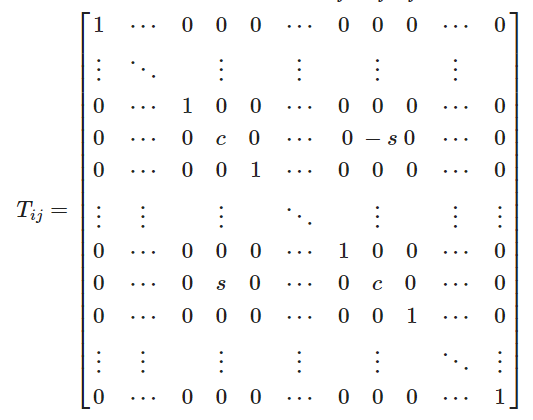

И все они ортогональны. Выходит, т.к. после процедуры имее верхнетреугольную матрицу с положительными элементами на главной диагонали*, действительно $QR$-разложение.

\* - Они положительны, т.к. из определения $ca[1]+sb[1] = \frac{a[1]^2+b[1]^2}{\sqrt{a[1]^2+b[1]^2}}$

# Задача 4

Покажите, что при больших n метод Гивенса требует
$$
\approx 4 n^{3 / 3}
$$
действий умножения. 

Докажите, что метод Гаусса требует примерно в 4 раза меньше.
Примените и тот, и другой метод для решения систем уравнений, используя библиотечные функции, и продемонстрируйте эту разницу измерением времени работы.

-----------------------------

При каждом обнулении элемента требуетс найти c и s, на что уходит 2 сложение, 2 умножения, 2 деления. Обнулить нужно $(n-1)n/2$ элемента в столбцах высоты от $n-1$ до 1. Для каждого такого элемента нужно выполнить еще от $2*n + 1$ до $3$ умножений при пересчете матрицы. Итого на элемент из i столбца уходит:

$$
(4 + 2(n-i+1) + 1)
$$

На столбец:
$$
(7-2i+2n)*(n-i)
$$

Суммируем по i от 1 до n:

$\approx \frac{2}{3}n^3$

Что-то не сошлось.

Для доказательств библиотечными функциями используем модуль time (основное время как раз дает умножение) и будем считать что необходимые методы реализованы в scipy.linalg.qr и scipy.linalg.lu

In [28]:
import scipy.linalg
import time
import matplotlib.pyplot as plt

In [37]:
N = 400
ns = np.arange(3, N, 3)
lut = []
qrt =[]

for n in ns:
    A = np.random.rand(N, N)
    t1 = time.time()
    p, l, u = scipy.linalg.lu(A)
    t2 = time.time()
    q, r = scipy.linalg.qr(A)
    t3 = time.time()
    lut.append(t2-t1)
    qrt.append(t3-t2)

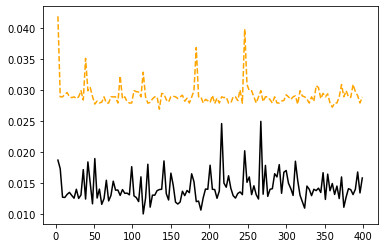

In [38]:
plt.plot(ns, lut, 'k-')
plt.plot(ns, qrt, c='orange', ls='--')
plt.show()

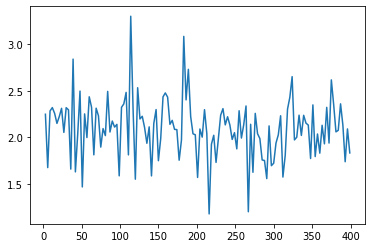

In [42]:
plt.plot(ns, np.array(qrt)/np.array(lut))

Не 4, но 2. По порядку сошлось и ладно. А вообще, LU разложение по идее чуть сложнее простого гаусса будет, так что все закономерно.

# Задача 5

Реализовать итерационный метод Гаусса решения СЛАУ и метод простой итерации. Использовать данные методы для решения систем различных размеров. Оценить скорость работы методов (необходимое количество операций на одну итерацию) в зависимости от размера системы. 

In [9]:
import numpy as np
from scipy import linalg as lg

In [97]:
def gauss_seidel(A, b, eps=1e-8, count=False):
    nb = np.reshape(b, (-1,1))
    LD = np.tril(A, k=0)
    U = np.triu(A, k=1)
    LDinv = lg.solve_triangular(LD, np.identity(LD.shape[0]), lower=True)
    LDinvU = -LDinv @ U
    LDb = LDinv @ nb
    q = np.linalg.norm(LDinvU, ord=2)
    x = np.zeros((A.shape[0], 1))
    xn = LDinvU @ x + LDb
    k = 1
    while(np.linalg.norm((xn - x), ord=2) > (1-q)*eps):
        x = xn
        k += 1
        xn = LDinvU @ x + LDb
    if count:
        return (xn, k)
    else:
        return xn

In [102]:
# finding parametre for S-I method
def find_tau(A):
    E = np.eye(A.shape[0])
    delta = 1
    t = 0
    dt = 1e-3
    q = np.linalg.norm(E-t*A, ord=2)
    k = 0
    while q > 0.8:
        dq = -np.linalg.norm(E-(t+dt)*A, ord=2) + q
        t += dq * delta
        k += 1
        if(k>100):
            k = 0
            delta *= 0.1
        q = np.linalg.norm(E-t*A, ord=2)
        
    return (t, q)

In [99]:
def simple_iteration(A, b, eps=1e-8, count=False):
    nb = np.reshape(b, (-1,1))
    t, q = find_tau(A)
    M = np.eye(A.shape[0]) - t*A
    tb = t*nb
    x = np.zeros(tb.shape)
    xn = M @ x + tb
    k = 1
    while(np.linalg.norm(xn-x, ord=2) > eps*(1-q)):
        k += 1
        x = xn
        xn= M @ x + tb
    if count:
        return (xn, k)
    else:
        return xn

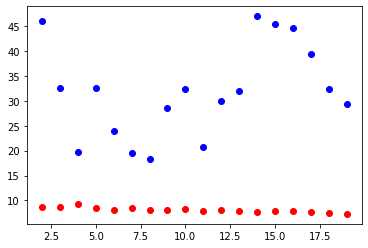

In [101]:
N = 20
eps = 1e-8
ns = np.arange(2, N)
gs = []
si = []
for n in range(2, N):
    kk1 = []
    kk2 = []
    for _ in range(20):
        # need to satisfy diagonal domination
        A = (10 - 20*np.random.rand(n, n)) + 10*n*np.eye(n)
        b= 10 - 20*np.random.rand(n)
        mine1, k1 = gauss_seidel(A, b, eps=eps, count=True)
        mine2, k2 = simple_iteration(A, b, eps=eps, count=True)
        kk1.append(k1)
        kk2.append(k2)
    gs.append(np.mean(kk1))
    si.append(np.mean(kk2))

import matplotlib.pyplot as plt
plt.scatter(ns, gs, c="red")
plt.scatter(ns, si, c='blue')
plt.show()
    

Как видно метод Гаусса-Зейделя дает лучшую сходимость (требуется меньше итераций)

Скорость методов:
Гаусс-Зейдель: на каждом шаге n новых х, каждый со сложостью в n сложений и 1 деление, т.е. n^2
МПИ: на каждом шаге перемножается матрица на вектор + еще n сложений, т.е. n^2

Однако число итераций в МПИ раз в 5 больше + надо как-то искать параметр, что ни разу не дешево в моей костыльной реализации градиентным спуском

# Задача 6

Если использовать метод простых итераций для симметричной положительно определённой матрицы, то верна теорема:

Пусть А - симметричная положительно определенная матрица:

 $A^{T}=A, \quad \gamma_{1} E \leq A \leq \gamma_{2} E$, 
 
 где положительные постоянные $\gamma_{1}, \gamma_{2}-$ соответственно минимальное и максимальное собственные значения матрицы $A .$ Тогда максимальная скорость сходимости итерационного процесса достигается при $\tau=\tau_{0}=2 /\left(\gamma_{1}+\gamma_{2}\right)$, при этом
 
$$
\left\|\delta^{k+1}\right\| \leq q\left\|\delta^{k}\right\|, \quad q=\frac{1-\gamma_{1} / \gamma_{2}}{1+\gamma_{1} / \gamma_{2}}
$$

Ответьте на вопрос - при каких значениях параметра метода простой итерации он сходится? Напишите генератор случайных симметричных положительно определённых матриц и программу, которая проверяет данное утверждение, выбирая несколько значений параметра МПИ, лежащих в том диапазоне, в котором этот метод сходится.

Проверка предусматривает вычисление скорости сходимости итерационного процесса путём сравнения невязок между собой. 



Достаточное условие - спектральный радиус 1-tA < 1, т.е. для любого $\lambda_i$ верно $0$ < $\tau$ < $2$/$\lambda_i$, или $\tau \in (0, \frac{2}{\gamma_2}$)

In [44]:
def sim_iter(A, b, t, eps=1e-3, steps=0):
    tb = t*np.reshape(b, (-1,1))
    M = np.eye(A.shape[0]) - t*A
    x = np.zeros(tb.shape)
    xn= M @ x + tb
    k = 0
    q = np.linalg.norm(M, ord=2)
    print(np.linalg.eigvals(M))
    print(M)
    print(q)
    while ((np.linalg.norm(xn-x, ord=2) > eps*(1-q)) and (steps==0)) or (k < steps):
        k += 1
        x = xn
        xn= M @ x + tb
    r = b - A @ xn 
    return (x, r)

In [45]:
n = 4
A = 2 - np.random.rand(n, n)
As = A.T @ A
b = (20 - 10*np.random.rand(n)).reshape(-1, 1)
print(As)

lds = np.linalg.eigvals(As)
l1 = np.min(lds)
l2 = np.max(lds)
topt = 2/(l1+l2)
print(lds)
print(topt)
x, r = sim_iter(A, b, topt, steps=1000)
print(x)
print(r)
print(np.linalg.cond(A, p=2))

[[7.71584851 8.60031074 8.03771508 8.04718494]
 [8.60031074 9.94846193 8.87497151 8.8785362 ]
 [8.03771508 8.87497151 8.60672305 8.51526856]
 [8.04718494 8.8785362  8.51526856 8.68547587]]
[34.27264701  0.49618029  0.05723421  0.13044786]
0.05825828488253832
[0.66210532+0.j         0.98065653+0.j         1.01674293+0.01864585j
 1.01674293-0.01864585j]
[[ 0.91787104 -0.11022712 -0.07299302 -0.06046793]
 [-0.07244322  0.93556742 -0.09724842 -0.07904993]
 [-0.10240384 -0.09902027  0.90331109 -0.11442437]
 [-0.06089393 -0.08751437 -0.07125641  0.91949816]]
1.0275845257920342
[[-1.57790933e+08]
 [ 7.76407259e+07]
 [ 1.48985393e+08]
 [-8.44557876e+07]]
[[-22548132.19559969]
 [-25390100.74307101]
 [ 64544711.80033585]
 [-16891182.0872694 ]]
24.470676206888665


Что-то все расходится